In [81]:
# pip install pyarrow
# pip install modin[all]
# pip install distributed
# pip install dask

In [82]:
# 데이터 크기가 커서 저장이 어려움. 따라서 dask dataframe으로 저장.
# pip install "dask[dataframe]" --upgrade


In [83]:
import os
#USE ONLY ONE OF THESE:
# os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask

new_dir = 'C:/Users/user/2023-2_TradeMachine/실전/hausdorff_distance_method'
os.chdir(new_dir)

# Import packages
import numpy as np
import csv
import dask.dataframe as dd # This is a main package to process a large csv file.
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd 

df3 = pd.read_csv('C:/Users/user/2023-2_TradeMachine/실전/hausdorff_distance_method/BTC_sum_both_10m.csv')


In [84]:
df_00 = pd.read_csv("C:/Users/user/2023-2_TradeMachine/실전/Data/BTC/BTC/0000.csv")

In [85]:
df_00.columns

Index(['Unnamed: 0', 'type_websocket', 'datetime', 'code', 'opening_price',
       'high_price', 'low_price', 'trade_price', 'prev_closing_price',
       'change', 'change_price', 'signed_change_price', 'change_rate',
       'signed_change_rate', 'trade_volume', 'acc_trade_volume',
       'acc_trade_volume_24h', 'acc_trade_price', 'acc_trade_price_24h',
       'trade_date', 'trade_time', 'trade_timestamp', 'ask_bid',
       'acc_ask_volume', 'acc_bid_volume', 'highest_52_week_price',
       'highest_52_week_date', 'lowest_52_week_price', 'lowest_52_week_date',
       'market_state', 'is_trading_suspended', 'delisting_date',
       'market_warning', 'timestamp', 'stream_type', 'sys_datetime',
       'sequential_id', 'total_ask_size', 'total_bid_size', 'orderbook_ap_0',
       'orderbook_as_0', 'orderbook_bp_0', 'orderbook_bs_0', 'orderbook_ap_1',
       'orderbook_as_1', 'orderbook_bp_1', 'orderbook_bs_1', 'orderbook_ap_2',
       'orderbook_as_2', 'orderbook_bp_2', 'orderbook_bs_2', 'o

In [86]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_00.head()

,Unnamed: 0,type_websocket,datetime,code,opening_price,high_price,low_price,trade_price,prev_closing_price,change,change_price,signed_change_price,change_rate,signed_change_rate,trade_volume,acc_trade_volume,acc_trade_volume_24h,acc_trade_price,acc_trade_price_24h,trade_date,trade_time,trade_timestamp,ask_bid,acc_ask_volume,acc_bid_volume,highest_52_week_price,highest_52_week_date,lowest_52_week_price,lowest_52_week_date,market_state,is_trading_suspended,delisting_date,market_warning,timestamp,stream_type,sys_datetime,sequential_id,total_ask_size,total_bid_size,orderbook_ap_0,orderbook_as_0,orderbook_bp_0,orderbook_bs_0,orderbook_ap_1,orderbook_as_1,orderbook_bp_1,orderbook_bs_1,orderbook_ap_2,orderbook_as_2,orderbook_bp_2,orderbook_bs_2,orderbook_ap_3,orderbook_as_3,orderbook_bp_3,orderbook_bs_3,orderbook_ap_4,orderbook_as_4,orderbook_bp_4,orderbook_bs_4,orderbook_ap_5,orderbook_as_5,orderbook_bp_5,orderbook_bs_5,orderbook_ap_6,orderbook_as_6,orderbook_bp_6,orderbook_bs_6,orderbook_ap_7,orderbook_as_7,orderbook_bp_7,orderbook_bs_7,orderbook_ap_8,orderbook_as_8,orderbook_bp_8,orderbook_bs_8,orderbook_ap_9,orderbook_as_9,orderbook_bp_9,orderbook_bs_9,orderbook_ap_10,orderbook_as_10,orderbook_bp_10,orderbook_bs_10,orderbook_ap_11,orderbook_as_11,orderbook_bp_11,orderbook_bs_11,orderbook_ap_12,orderbook_as_12,orderbook_bp_12,orderbook_bs_12,orderbook_ap_13,orderbook_as_13,orderbook_bp_13,orderbook_bs_13,orderbook_ap_14,orderbook_as_14,orderbook_bp_14,orderbook_bs_14
0,13630,orderbook,2022-12-16 21:05:36.000,KRW-BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1671192336839,NaN,2022-12-16 21:05:36.962,NaN,12.572064,43.355116,22570000.0,2.299561,22568000.0,0.437095,22571000.0,1.359031,22558000.0,0.000441,22578000.0,0.444919,22557000.0,0.223807,22580000.0,0.748174,22556000.0,0.918411,22581000.0,0.377,22555000.0,3.401517,22585000.0,0.289745,22554000.0,0.039866,22586000.0,2.27448,22552000.0,0.004878,22587000.0,1.239113,22551000.0,0.698997,22591000.0,0.560116,22550000.0,36.872502,22592000.0,1.279305,22549000.0,0.004347,22593000.0,0.580447,22548000.0,0.031437,22594000.0,0.138398,22547000.0,0.144656,22595000.0,0.3,22545000.0,0.392714,22596000.0,0.041776,22544000.0,0.143039,22598000.0,0.64,22543000.0,0.041408
1,28121,trade,2022-12-16 21:05:37.000,KRW-BTC,NaN,NaN,NaN,22568000.0,22942000.0,FALL,374000.0,NaN,NaN,NaN,0.003899,NaN,NaN,NaN,NaN,NaN,12:05:37,1.671192e+12,ASK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1671192337188,REALTIME,2022-12-16 21:05:37.278,1.671192e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28122,ticker,2022-12-16 21:05:37.000,KRW-BTC,22952000.0,23050000.0,22500000.0,22568000.0,22942000.0,FALL,374000.0,-374000.0,0.016302,-0.016302,0.003899,2409.572175,3704.241755,5.481087e+10,8.465841e+10,20221216.0,120537,1.671192e+12,ASK,1469.562531,940.009644,62850000.0,2021-12-24,21509000.0,2022-11-14,ACTIVE,0.0,NaN,NONE,1671192337188,REALTIME,2022-12-16 21:05:37.281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28123,orderbook,2022-12-16 21:05:37.000,KRW-BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1671192337200,NaN,2022-12-16 21:05:37.354,NaN,12.572064,43.351216,22570000.0,2.299561,22568000.0,0.433195,22571000.0,1.359031,22558000.0,0.000441,22578000.0,0.444919,22557000.0,0.223807,22580000.0,0.748174,22556000.0,0.918411,22581000.0,0.377,22555000.0,3.401517,22585000.0,0.289745,22554000.0,0.039866,22586000.0,2.27448,22552000.0,0.004878,22587000.0,1.239113,22551000.0,0.698997,22591000.0

In [87]:
pd.DataFrame(df_00.isnull().sum()).head()

,0
Unnamed: 0,0
type_websocket,0
datetime,0
code,0
opening_price,16774


DTW (Dynamic Time Warping)는 시계열 데이터의 패턴을 비교할 때 서로 다른 길이의 시계열 간의 유사성도 측정할 수 있게 해줌. 

DTW의 주요 아이디어는 시계열 데이터 간의 "비용" 또는 "거리"를 최소화하는 방식으로 
시계열 간의 "최적" 대응을 찾는 것입니다. 

이러한 대응은 시계열 간의 로컬(또는 일시적) 스트레칭 또는 압축을 허용하여 시계열 데이터의 패턴을 더 잘 비교할 수 있게 합니다.



DTW의 원리는 다음과 같다:

1. 비용 행렬 생성: 두 시계열 X와 Y를 사용하여 비용 행렬을 생성합니다. 
이 행렬의 각 요소는 시계열 X의 한 점과 시계열 Y의 한 점 사이의 거리(또는 비용)을 나타냅니다.

2. 누적 비용 계산: 비용 행렬을 기반으로 누적 비용 행렬을 계산하여 각 지점에서의 최소 누적 비용을 저장합니다.

3. 최적 경로 탐색: 누적 비용 행렬을 사용하여 최적의 경로를 탐색하고, 이 경로는 두 시계열 간의 최적 대응을 나타냅니다.

## DTW (1st trial): 시계열 데이터가 같은 것끼리만 뽑아서 DTW 구하기

In [88]:
df_00 = pd.read_csv("C:/Users/user/2023-2_TradeMachine/실전/Data/BTC/BTC/0000.csv")
df_00_original = df_00


In [89]:
# dtw 거리를 구하는데 주로 사용되는 라이브러리: fastdtw, scipy, tslearn 
# 그런데 위 3개의 라이브러리는 현재 환경에서 사용할 수가 없음. 자꾸 에러나고, 1-D로 바꾸지 못함. 
# 왜 그럴까.. 몰라..
# 그래서 그냥 수동으로 dtw 구하는 함수를 만들어서 쓰자. -> compute_dtw_manual

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
df_00 = pd.read_csv("C:/Users/user/2023-2_TradeMachine/실전/Data/BTC/BTC/0000.csv")

# Convert 'datetime' column to datetime format and create a new variable rounded to 1-minute intervals
df_00['datetime'] = pd.to_datetime(df_00['datetime'])
df_00['datetime_1min'] = df_00['datetime'].dt.round('1min')

# Normalize 'trade_price' column
df_00 = df_00[np.isfinite(df_00['trade_price'])]
scaler = MinMaxScaler()
df_00['trade_price'] = scaler.fit_transform(df_00[['trade_price']])

# Select a specific datetime_1min
target_datetime = pd.Timestamp('2022-12-16 21:06:00')

# Extract the series corresponding to the target datetime
target_series = df_00[df_00['datetime_1min'] == target_datetime]['trade_price'].to_numpy()

def compute_dtw_manual(x, y):
    """Compute Dynamic Time Warping distance."""
    
    nx, ny = len(x), len(y)
    dtw_matrix = np.zeros((nx+1, ny+1))
    dtw_matrix[0, 1:] = np.inf
    dtw_matrix[1:, 0] = np.inf
    
    for i in range(1, nx+1):
        for j in range(1, ny+1):
            cost = abs(x[i-1] - y[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1])
            
    return dtw_matrix[nx, ny]

# Initialize an empty list to store results
result = []

# Compute the DTW distance between the target_series and every other series in df_00
for datetime_1min in df_00['datetime_1min'].unique():
    if datetime_1min != target_datetime:
        compare_series = df_00[df_00['datetime_1min'] == datetime_1min]['trade_price'].to_numpy()
        
        # Check if the series are of the same length; if not, continue to the next iteration
        if len(target_series) != len(compare_series): # -> 이 부분! -> 길이가 서로 다른 시계열 데이터 간의 DTW 거리를 계산하지 않음
            continue
        
        distance = compute_dtw_manual(target_series, compare_series)
        result.append((datetime_1min, distance))

# Sort the results based on DTW distance (ascending)
result.sort(key=lambda x: x[1])

# Extract the top 10 datetime_1min values with the smallest DTW distances
similar_datetime_ids = [x[0] for x in result[:10]]
similar_distances = [x[1] for x in result[:10]]

print("Similar datetime_1min values:", similar_datetime_ids)
print("Their DTW distances:", similar_distances)


Similar datetime_1min values: [Timestamp('2022-12-16 21:50:00'), Timestamp('2022-12-16 21:31:00')]
Their DTW distances: [4.055045871559855, 5.614678899082094]


위에 결과값이 10개 나와야 되는데, 2개만 나옴.
특정 datetime_1min에 해당하는 데이터 포인트의 개수와 다른 datetime_1min에 해당하는 데이터 포인트의 개수가 서로 다르다는 의미임. 

예를 들어, datetime_1min 값이 '2022-12-16 21:06:00'인 경우 해당 시간에 5개의 데이터 포인트(거래 가격)가 있을 수 있다. 

반면, datetime_1min 값이 '2022-12-16 21:07:00'인 경우 해당 시간에 6개의 데이터 포인트(거래 가격)가 있을 수 있다. 

이렇게 각 datetime_1min 값에 따라 해당 시간에 기록된 데이터 포인트의 개수가 다를 수 있다.

지금 위 코드는 길이가 다른 시계열 데이터 간의 DTW 거리를 계산하지 않도록 설정되어 있다. 

따라서 길이가 target_datetime의 데이터 포인트 개수와 동일한 datetime_1min 값만 결과로 반환되었다.

하지만, DTW 알고리즘 자체는 길이가 다른 시계열 데이터 간의 거리도 계산할 수 있기 때문에, 코드에서 이 조건을 (어떤 조건? -> 길이가 같은 시계열 데이터끼리만 유사성 계산) 제거하면 더 많은 datetime_1min 값들에 대한 결과를 얻을 수 있을 것임.







## DTW (2nd trial): 시계열 데이터 거리가 다른 것끼리 할 수 있도록

In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 파일 업로드
df_00 = pd.read_csv("C:/Users/user/2023-2_TradeMachine/실전/Data/BTC/BTC/0000.csv")

# 'datetime' 컬럼을 datetime 형식으로 변환하고, 1분 간격으로 반올림하여 새 변수를 생성
df_00['datetime'] = pd.to_datetime(df_00['datetime'])
df_00['datetime_1min'] = df_00['datetime'].dt.round('1min')

# 'trade_price' 컬럼을 정규화합
df_00 = df_00[np.isfinite(df_00['trade_price'])]
scaler = MinMaxScaler()
df_00['trade_price'] = scaler.fit_transform(df_00[['trade_price']])

# 특정 datetime_1min 값을 선택
target_datetime = pd.Timestamp('2022-12-16 21:06:00')

# 대상 datetime에 해당하는 시계열을 추출
target_series = df_00[df_00['datetime_1min'] == target_datetime]['trade_price'].to_numpy()
# 타겟 날짜와 같은 datetime의 값들을 가져와서, 그 datetime들의 trade_price를 numpy 배열로 변환해서 저장
# 조건에 맞는 데이터를 1-D 배열로, array로 바꾼 것임 (계산이 더 빨라짐)

# Dynamic Time Warping 거리를 계산하는 함수를 정의
def compute_dtw_manual(x, y): # 두 개의 입력 인수는 시계열 데이터 x와 y임
    """주어진 두 시계열 x와 y 사이의 Dynamic Time Warping 거리를 계산합니다."""
    
    nx, ny = len(x), len(y) # 입력된 두 시계열의 길이 저장
    dtw_matrix = np.zeros((nx+1, ny+1)) # 행렬의 크기는 (nx_1)x(ny+1)이며, 모든 요소는 0으로 초기화 
    dtw_matrix[0, 1:] = np.inf # 첫 번째 행의 두 번째 열부터 마지막 열까지의 모든 값을 무한대로 설정
    dtw_matrix[1:, 0] = np.inf # 첫 번째 열의 두 번째 행부터 마지막 행까지의 모든 값을 무한대로 설정
    
    # 시계열 X와 Y의 각 점 사이의 거리를 계산하고, 누적 비용 행렬을 계산한다. 여기서 각 지점에서의 최소 누적 비용을 구하기 위해 이전 위치의 최소값을 선택.
    for i in range(1, nx+1):
        for j in range(1, ny+1): # x와 y의 각각 요소에 대해 반복한다
            cost = abs(x[i-1] - y[j-1]) # x의 i번째 요소와 y의 j번째 요소 간의 절대 차이를 계산하여 비용을 설정 => 시계열 X와 Y의 각 점 사이의 거리를 계산
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]) # => 누적 비용 행렬을 계산
            # dtw_matrix[i, j] -> 현재 위치의 DTW 값은 비용과 이전 위치의 최소 DTW 값의 합으로 설정 => 각 지점에서의 최소 누적 비용을 구하기 위해 이전 위치의 최소값을 선택
            
    return dtw_matrix[nx, ny] # 최종적으로 계산된 DTW 거리, 즉 행렬의 오른쪽 하단 모서리 값,를 반환




# 결과를 저장할 리스트를 초기화
result = []

# 대상 시계열과 df_00의 다른 모든 시계열 간의 DTW 거리를 계산
# 'datetime_1min' 컬럼의 모든 고유값에 대해 반복문 실행
for datetime_1min in df_00['datetime_1min'].unique():
    # 현재 반복 중인 datetime_1min이 대상 datetime과 같지 않은 경우만 처리 (자기 자신과의 비교를 피하기 위함)
    if datetime_1min != target_datetime:
        # 현재 반복 중인 datetime_1min에 해당하는 시계열 데이터를 추출
        compare_series = df_00[df_00['datetime_1min'] == datetime_1min]['trade_price'].to_numpy()
        # 대상 시계열과 현재 반복 중인 시계열 간의 DTW 거리를 계산
        distance = compute_dtw_manual(target_series, compare_series)
        # 계산된 DTW 거리와 해당 datetime_1min을 결과 리스트에 추가
        result.append((datetime_1min, distance))

# DTW 'import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 파일 업로드
df_00 = pd.read_csv("C:/Users/user/2023-2_TradeMachine/실전/Data/BTC/BTC/0000.csv")

# 'datetime' 컬럼을 datetime 형식으로 변환하고, 1분 간격으로 반올림하여 새 변수를 생성
df_00['datetime'] = pd.to_datetime(df_00['datetime'])
df_00['datetime_1min'] = df_00['datetime'].dt.round('1min')

# 'trade_price' 컬럼을 정규화합
df_00 = df_00[np.isfinite(df_00['trade_price'])]
scaler = MinMaxScaler()
df_00['trade_price'] = scaler.fit_transform(df_00[['trade_price']])

# 특정 datetime_1min 값을 선택
target_datetime = pd.Timestamp('2022-12-16 21:06:00')

# 대상 datetime에 해당하는 시계열을 추출
target_series = df_00[df_00['datetime_1min'] == target_datetime]['trade_price'].to_numpy()
# 타겟 날짜와 같은 datetime의 값들을 가져와서, 그 datetime들의 trade_price를 numpy 배열로 변환해서 저장
# 조건에 맞는 데이터를 1-D 배열로, array로 바꾼 것임 (계산이 더 빨라짐)

# Dynamic Time Warping 거리를 계산하는 함수를 정의
def compute_dtw_manual(x, y): # 두 개의 입력 인수는 시계열 데이터 x와 y임
    """주어진 두 시계열 x와 y 사이의 Dynamic Time Warping 거리를 계산합니다."""
    
    nx, ny = len(x), len(y) # 입력된 두 시계열의 길이 저장
    dtw_matrix = np.zeros((nx+1, ny+1)) # 행렬의 크기는 (nx_1)x(ny+1)이며, 모든 요소는 0으로 초기화 
    dtw_matrix[0, 1:] = np.inf # 첫 번째 행의 두 번째 열부터 마지막 열까지의 모든 값을 무한대로 설정
    dtw_matrix[1:, 0] = np.inf # 첫 번째 열의 두 번째 행부터 마지막 행까지의 모든 값을 무한대로 설정
    
    # 시계열 X와 Y의 각 점 사이의 거리를 계산하고, 누적 비용 행렬을 계산한다. 여기서 각 지점에서의 최소 누적 비용을 구하기 위해 이전 위치의 최소값을 선택.
    for i in range(1, nx+1):
        for j in range(1, ny+1): # x와 y의 각각 요소에 대해 반복한다
            cost = abs(x[i-1] - y[j-1]) # x의 i번째 요소와 y의 j번째 요소 간의 절대 차이를 계산하여 비용을 설정 => 시계열 X와 Y의 각 점 사이의 거리를 계산
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]) # => 누적 비용 행렬을 계산
            # dtw_matrix[i, j] -> 현재 위치의 DTW 값은 비용과 이전 위치의 최소 DTW 값의 합으로 설정 => 각 지점에서의 최소 누적 비용을 구하기 위해 이전 위치의 최소값을 선택
            
    return dtw_matrix[nx, ny] # 최종적으로 계산된 DTW 거리, 즉 행렬의 오른쪽 하단 모서리 값,를 반환




# 결과를 저장할 리스트를 초기화
result = []

# 대상 시계열과 df_00의 다른 모든 시계열 간의 DTW 거리를 계산
# 'datetime_1min' 컬럼의 모든 고유값에 대해 반복문 실행
for datetime_1min in df_00['datetime_1min'].unique():
    # 현재 반복 중인 datetime_1min이 대상 datetime과 같지 않은 경우만 처리 (자기 자신과의 비교를 피하기 위함)
    if datetime_1min != target_datetime:
        # 현재 반복 중인 datetime_1min에 해당하는 시계열 데이터를 추출
        compare_series = df_00[df_00['datetime_1min'] == datetime_1min]['trade_price'].to_numpy()
        # 대상 시계열과 현재 반복 중인 시계열 간의 DTW 거리를 계산
        distance = compute_dtw_manual(target_series, compare_series)
        # 계산된 DTW 거리와 해당 datetime_1min을 결과 리스트에 추가
        result.append((datetime_1min, distance))

# DTW 거리를 기준으로 결과를 오름차순으로 정렬
result.sort(key=lambda x: x[1])

# 가장 작은 DTW 거리를 갖는 상위 10개의 datetime_1min 값을 추출
similar_datetime_ids = [x[0] for x in result[:10]]
similar_distances = [x[1] for x in result[:10]]

print("Similar datetime_1min values:", similar_datetime_ids)
print("Their DTW distances:", similar_distances)


# DTW의 'distance' 를 기준으로 결과를 오름차순으로 정렬
result.sort(key=lambda x: x[1])

# 가장 작은 DTW 거리를 갖는 상위 10개의 datetime_1min 값을 추출
similar_datetime_ids = [x[0] for x in result[:10]]
similar_distances = [x[1] for x in result[:10]]

print("Similar datetime_1min values:", similar_datetime_ids)
print("Their DTW distances:", similar_distances)




Similar datetime_1min values: [Timestamp('2022-12-16 21:40:00'), Timestamp('2022-12-16 21:45:00'), Timestamp('2022-12-16 21:44:00'), Timestamp('2022-12-16 21:46:00'), Timestamp('2022-12-16 21:42:00'), Timestamp('2022-12-16 21:43:00'), Timestamp('2022-12-16 21:47:00'), Timestamp('2022-12-16 21:37:00'), Timestamp('2022-12-16 21:38:00'), Timestamp('2022-12-16 21:41:00')]
Their DTW distances: [0.05504587155959939, 0.3486238532105972, 0.5688073394491937, 0.5963302752296329, 0.6055045871553943, 0.8623853211004757, 0.9449541284407417, 0.972477064220044, 0.9908256880730164, 1.1284403669723702]
Similar datetime_1min values: [Timestamp('2022-12-16 21:40:00'), Timestamp('2022-12-16 21:45:00'), Timestamp('2022-12-16 21:44:00'), Timestamp('2022-12-16 21:46:00'), Timestamp('2022-12-16 21:42:00'), Timestamp('2022-12-16 21:43:00'), Timestamp('2022-12-16 21:47:00'), Timestamp('2022-12-16 21:37:00'), Timestamp('2022-12-16 21:38:00'), Timestamp('2022-12-16 21:41:00')]
Their DTW distances: [0.055045871559

## DTW (3rd trial): 함수로 만들어서 다시 코드 작성

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def compute_dtw_manual(x, y):
    """주어진 두 시계열 x와 y 사이의 Dynamic Time Warping 거리를 계산합니다."""
    nx, ny = len(x), len(y)
    dtw_matrix = np.zeros((nx+1, ny+1))
    dtw_matrix[0, 1:] = np.inf
    dtw_matrix[1:, 0] = np.inf
    for i in range(1, nx+1):
        for j in range(1, ny+1):
            cost = abs(x[i-1] - y[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1])
    return dtw_matrix[nx, ny]

def compute_dtw_for_all(df):
    # 'datetime_1min'의 모든 값에 대한 DTW 거리를 계산
    dtw_results = []
    for target_datetime in df['datetime_1min'].unique():
        target_series = df[df['datetime_1min'] == target_datetime]['trade_price'].to_numpy()
        result = []
        for compare_datetime in df['datetime_1min'].unique():
            if compare_datetime != target_datetime:
                compare_series = df[df['datetime_1min'] == compare_datetime]['trade_price'].to_numpy()
                distance = compute_dtw_manual(target_series, compare_series)
                result.append((compare_datetime, distance))
        result.sort(key=lambda x: x[1])
        similar_datetime_ids = [x[0] for x in result[:10]]
        similar_distances = [np.round(x[1],2) for x in result[:10]]
        dtw_results.append((target_datetime, similar_datetime_ids, similar_distances))
    
    # 결과를 df_00에 추가
    df['similar_datetime_ids'] = pd.Series([x[1] for x in dtw_results])
    df['similar_distances'] = pd.Series([x[2] for x in dtw_results])

    return df

# 데이터 로드 및 전처리
df_00 = pd.read_csv("C:/Users/user/2023-2_TradeMachine/실전/Data/BTC/BTC/0000.csv")
df_00['datetime'] = pd.to_datetime(df_00['datetime'])
df_00['datetime_1min'] = df_00['datetime'].dt.round('1min')
df_00 = df_00[np.isfinite(df_00['trade_price'])]
scaler = MinMaxScaler()
df_00['trade_price'] = scaler.fit_transform(df_00[['trade_price']])

# 함수 실행
df_00 = compute_dtw_for_all(df_00)


In [92]:
df_00.head()

,Unnamed: 0,type_websocket,datetime,code,opening_price,high_price,low_price,trade_price,prev_closing_price,change,change_price,signed_change_price,change_rate,signed_change_rate,trade_volume,acc_trade_volume,acc_trade_volume_24h,acc_trade_price,acc_trade_price_24h,trade_date,trade_time,trade_timestamp,ask_bid,acc_ask_volume,acc_bid_volume,highest_52_week_price,highest_52_week_date,lowest_52_week_price,lowest_52_week_date,market_state,is_trading_suspended,delisting_date,market_warning,timestamp,stream_type,sys_datetime,sequential_id,total_ask_size,total_bid_size,orderbook_ap_0,orderbook_as_0,orderbook_bp_0,orderbook_bs_0,orderbook_ap_1,orderbook_as_1,orderbook_bp_1,orderbook_bs_1,orderbook_ap_2,orderbook_as_2,orderbook_bp_2,orderbook_bs_2,orderbook_ap_3,orderbook_as_3,orderbook_bp_3,orderbook_bs_3,orderbook_ap_4,orderbook_as_4,orderbook_bp_4,orderbook_bs_4,orderbook_ap_5,orderbook_as_5,orderbook_bp_5,orderbook_bs_5,orderbook_ap_6,orderbook_as_6,orderbook_bp_6,orderbook_bs_6,orderbook_ap_7,orderbook_as_7,orderbook_bp_7,orderbook_bs_7,orderbook_ap_8,orderbook_as_8,orderbook_bp_8,orderbook_bs_8,orderbook_ap_9,orderbook_as_9,orderbook_bp_9,orderbook_bs_9,orderbook_ap_10,orderbook_as_10,orderbook_bp_10,orderbook_bs_10,orderbook_ap_11,orderbook_as_11,orderbook_bp_11,orderbook_bs_11,orderbook_ap_12,orderbook_as_12,orderbook_bp_12,orderbook_bs_12,orderbook_ap_13,orderbook_as_13,orderbook_bp_13,orderbook_bs_13,orderbook_ap_14,orderbook_as_14,orderbook_bp_14,orderbook_bs_14,datetime_1min,similar_datetime_ids,similar_distances
1,28121,trade,2022-12-16 21:05:37,KRW-BTC,NaN,NaN,NaN,0.458716,22942000.0,FALL,374000.0,NaN,NaN,NaN,0.003899,NaN,NaN,NaN,NaN,NaN,12:05:37,1.671192e+12,ASK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1671192337188,REALTIME,2022-12-16 21:05:37.278,1.671192e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-16 21:06:00,"[2022-12-16 21:27:00, 2022-12-16 21:35:00, 202...","[2.12, 2.44, 2.74, 2.84, 2.89, 2.92, 3.02, 3.1..."
2,28122,ticker,2022-12-16 21:05:37,KRW-BTC,22952000.0,23050000.0,22500000.0,0.458716,22942000.0,FALL,374000.0,-374000.0,0.016302,-0.016302,0.003899,2409.572175,3704.241755,5.481087e+10,8.465841e+10,20221216.0,120537,1.671192e+12,ASK,1469.562531,940.009644,62850000.0,2021-12-24,21509000.0,2022-11-14,ACTIVE,0.0,NaN,NONE,1671192337188,REALTIME,2022-12-16 21:05:37.281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-16 21:06:00,"[2022-12-16 21:35:00, 2022-12-16 21:32:00, 202...","[0.84, 1.05, 1.15, 1.21, 1.25, 1.29, 1.43, 1.5..."
5,13641,trade,2022-12-16 21:05:37,KRW-BTC,NaN,NaN,NaN,0.458716,22942000.0,FALL,374000.0,NaN,NaN,NaN,0.017509,NaN,NaN,NaN,NaN,NaN,12:05:37,1.671192e+12,ASK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1671192337961,REALTIME,2022-12-16 21:05:38.051,1.671192e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-16 21:06:00,"[2022-12-16 21:12:00, 2022-12-16 21:21:00, 202...","[0.68, 1.05, 1.25, 1.33, 1.38, 1.42, 1.5, 1.57..."
6,13642,ticker,2022-12-16 21:05:37,KRW-BTC,22952000.0,23050000.0,22500000.0,0.458716,22942000.0,FALL,374000.0,-374000.0,0.016302,-0.016302,0.017509,2409.589684,3704.241755,5.481126e+10,8.465841e+10,20221216.0,120537,1.671192e+12,ASK,1469.580040,940.009644,62850000.0,2021-12-24,21509000.0,2022-11-14,ACTIVE,0.0,NaN,NONE,1671192337961,REALTIME,2022-12-16 21:05:38.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [93]:
df_00.datetime_1min.unique()

<DatetimeArray>
['2022-12-16 21:06:00', '2022-12-16 21:07:00', '2022-12-16 21:08:00',
 '2022-12-16 21:09:00', '2022-12-16 21:10:00', '2022-12-16 21:11:00',
 '2022-12-16 21:12:00', '2022-12-16 21:13:00', '2022-12-16 21:14:00',
 '2022-12-16 21:15:00',
 ...
 '2022-12-16 22:49:00', '2022-12-16 22:50:00', '2022-12-16 22:51:00',
 '2022-12-16 22:52:00', '2022-12-16 22:53:00', '2022-12-16 22:54:00',
 '2022-12-16 22:55:00', '2022-12-16 22:56:00', '2022-12-16 22:57:00',
 '2022-12-16 22:58:00']
Length: 113, dtype: datetime64[ns]

## 그래프 그리기 

 ### 첫 번째 행 

C:\Users\user\AppData\Local\Temp\ipykernel_39740\871838789.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot_date(sorted_datetime_time, sorted_distances_time, marker='o', linestyle='-')


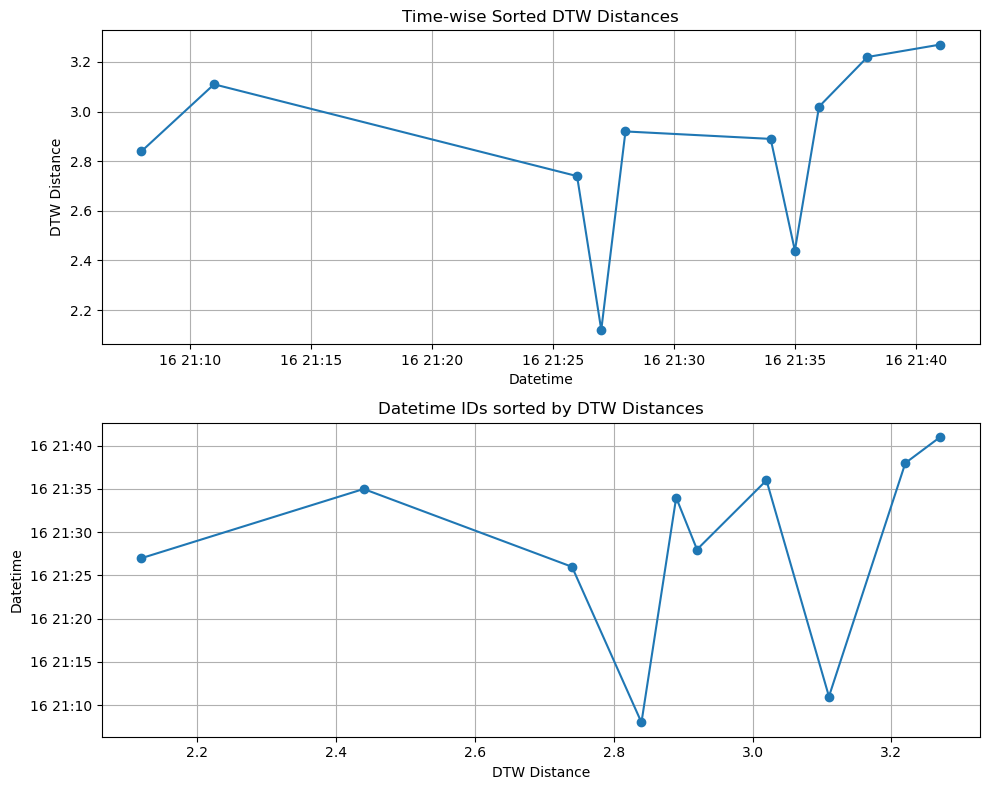

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 첫 번째 행의 similar_datetime_ids와 similar_distances 값을 추출
similar_datetime_ids = df_00.iloc[0]['similar_datetime_ids']
similar_distances = df_00.iloc[0]['similar_distances']

# similar_datetime_ids의 시간순으로 데이터 정렬
sorted_indices_time = sorted(range(len(similar_datetime_ids)), key=lambda k: similar_datetime_ids[k])
sorted_datetime_time = [similar_datetime_ids[i] for i in sorted_indices_time]
sorted_distances_time = [similar_distances[i] for i in sorted_indices_time]

# similar_distances의 값 순으로 데이터 정렬
sorted_indices_distance = np.argsort(similar_distances)
sorted_datetime_distance = [similar_datetime_ids[i] for i in sorted_indices_distance]
sorted_distances_distance_sorted = [similar_distances[i] for i in sorted_indices_distance]

# 그래프 그리기
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# similar_datetime_ids의 시간순으로 꺾은선 그래프 그리기
axs[0].plot_date(sorted_datetime_time, sorted_distances_time, marker='o', linestyle='-')
axs[0].set_title('Time-wise Sorted DTW Distances')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('DTW Distance')
axs[0].grid(True)

# similar_distances가 작은 순으로 similar_datetime_ids 꺾은선 그래프 그리기
axs[1].plot(sorted_distances_distance_sorted, sorted_datetime_distance, marker='o', linestyle='-')
axs[1].set_title('Datetime IDs sorted by DTW Distances')
axs[1].set_ylabel('Datetime')
axs[1].set_xlabel('DTW Distance')
axs[1].grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()


### 두 번째 행 

C:\Users\user\AppData\Local\Temp\ipykernel_39740\2378401167.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot_date(sorted_datetime_time, sorted_distances_time, marker='o', linestyle='-')


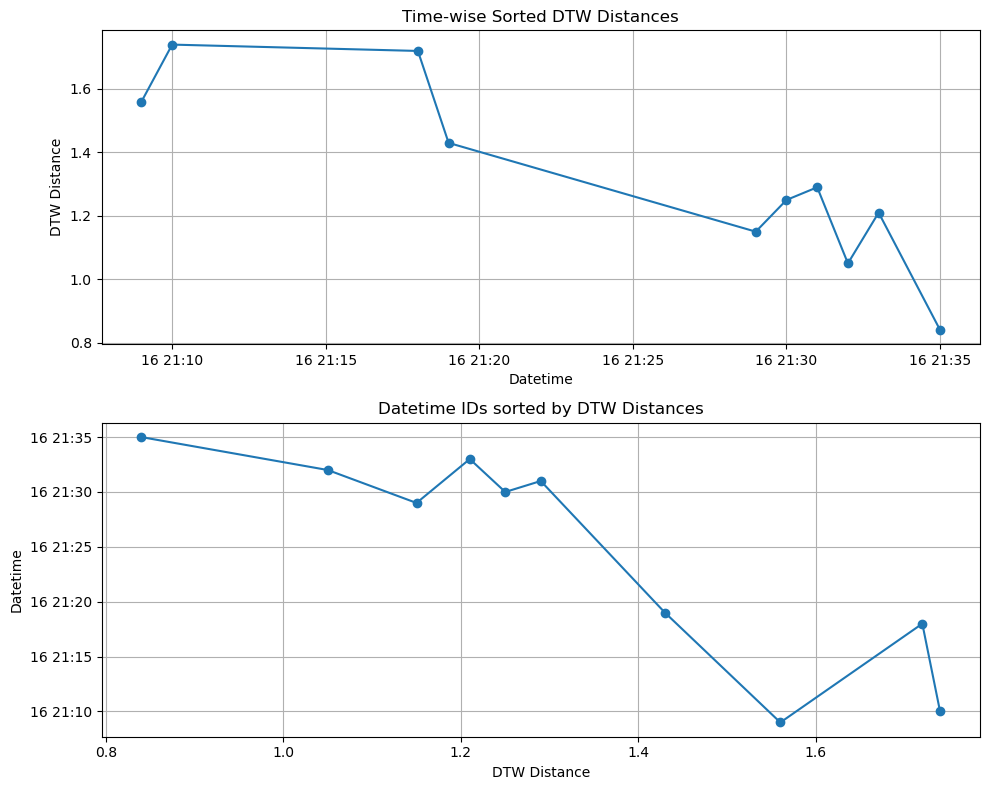

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 첫 번째 행의 similar_datetime_ids와 similar_distances 값을 추출
similar_datetime_ids = df_00.iloc[1]['similar_datetime_ids']
similar_distances = df_00.iloc[1]['similar_distances']

# similar_datetime_ids의 시간순으로 데이터 정렬
sorted_indices_time = sorted(range(len(similar_datetime_ids)), key=lambda k: similar_datetime_ids[k])
sorted_datetime_time = [similar_datetime_ids[i] for i in sorted_indices_time]
sorted_distances_time = [similar_distances[i] for i in sorted_indices_time]

# similar_distances의 값 순으로 데이터 정렬
sorted_indices_distance = np.argsort(similar_distances)
sorted_datetime_distance = [similar_datetime_ids[i] for i in sorted_indices_distance]
sorted_distances_distance_sorted = [similar_distances[i] for i in sorted_indices_distance]

# 그래프 그리기
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# similar_datetime_ids의 시간순으로 꺾은선 그래프 그리기
axs[0].plot_date(sorted_datetime_time, sorted_distances_time, marker='o', linestyle='-')
axs[0].set_title('Time-wise Sorted DTW Distances')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('DTW Distance')
axs[0].grid(True)

# similar_distances가 작은 순으로 similar_datetime_ids 꺾은선 그래프 그리기
axs[1].plot(sorted_distances_distance_sorted, sorted_datetime_distance, marker='o', linestyle='-')
axs[1].set_title('Datetime IDs sorted by DTW Distances')
axs[1].set_ylabel('Datetime')
axs[1].set_xlabel('DTW Distance')
axs[1].grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()
